# **Analisis de datos de Space x**

## Parte 1: Analisis de datos en formato JSON

In [ ]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import requests


In [ ]:
url = "https://api.spacexdata.com/v4/launches/past"
response = requests.get(url)
response.json() # JSON significa JavaScript Object Notation. Es un formato de texto muy usado para guardar y compartir datos entre sistemas


[{'fairings': {'reused': False,
   'recovery_attempt': False,
   'recovered': False,
   'ships': []},
  'links': {'patch': {'small': 'https://images2.imgbox.com/94/f2/NN6Ph45r_o.png',
    'large': 'https://images2.imgbox.com/5b/02/QcxHUb5V_o.png'},
   'reddit': {'campaign': None,
    'launch': None,
    'media': None,
    'recovery': None},
   'flickr': {'small': [], 'original': []},
   'presskit': None,
   'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88',
   'youtube_id': '0a_00nJ_Y88',
   'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html',
   'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'},
  'static_fire_date_utc': '2006-03-17T00:00:00.000Z',
  'static_fire_date_unix': 1142553600,
  'net': False,
  'window': 0,
  'rocket': '5e9d0d95eda69955f709d1eb',
  'success': False,
  'failures': [{'time': 33,
    'altitude': None,
    'reason': 'merlin engine failure'}],
  'details': 'Engine failure at 33 seconds and loss of vehicle',
  'crew

In [ ]:
# Normalizaremmos los datos en una tabla
data = pd.json_normalize(response.json())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   static_fire_date_utc       121 non-null    object 
 1   static_fire_date_unix      121 non-null    float64
 2   net                        187 non-null    bool   
 3   window                     117 non-null    float64
 4   rocket                     187 non-null    object 
 5   success                    186 non-null    object 
 6   failures                   187 non-null    object 
 7   details                    134 non-null    object 
 8   crew                       187 non-null    object 
 9   ships                      187 non-null    object 
 10  capsules                   187 non-null    object 
 11  payloads                   187 non-null    object 
 12  launchpad                  187 non-null    object 
 13  flight_number              187 non-null    int64  

## Parte 2


In [ ]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

De la columna <code>rocket</code> nos gustaría saber el nombre del amplificador.

In [ ]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

Desde el <code>launchpad</code> nos gustaría saber el nombre del sitio de lanzamiento que se está utilizando, la ubicación y la latitud.

In [ ]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

De <code>payload</code> nos gustaría conocer la masa de la carga útil y la órbita a la que se dirige.




In [ ]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

De <code>Core</code> nos gustaría conocer el resultado del aterrizaje, el tipo de aterrizaje, la cantidad de vuelos con ese núcleo, si se utilizaron aletas de rejilla, si se reutilizó el núcleo, si se utilizaron patas, la plataforma de aterrizaje utilizada, el bloque del núcleo, que es un número utilizado para separar la versión de los núcleos, la cantidad de veces que se reutilizó este núcleo específico y el número de serie del núcleo.

In [ ]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

## Parte 3: Ejercicio descarga de datos de Space X = Falcon 9

**Task 1: Request and parse the SpaceX launch data using the GET request**

- To make the requested JSON results more consistent, we will use the following static response object for this project:

In [ ]:
# spacex_url="https://api.spacexdata.com/v4/launches/past"
# response = requests.get(spacex_url)
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response=requests.get(static_json_url)
response.status_code

200

In [ ]:
# Use json_normalize meethod to convert the json result into a dataframe
data = pd.json_normalize(response.json())
# Get the head of the dataframe
data.head(1)

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN


Observarás que muchos de los datos son identificadores. Por ejemplo, la columna "cohete" no contiene información sobre el cohete, solo un número de identificación.

Ahora usaremos la API de nuevo para obtener información sobre los lanzamientos utilizando los identificadores asignados a cada uno. En concreto, usaremos las columnas "cohete", "carga útil", "plataforma de lanzamiento" y "núcleos".

In [ ]:

# Tomemos un subconjunto de nuestro marco de datos manteniendo solo las características que queremos y el  flight number, and date utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Eliminaremos filas con múltiples núcleos porque son cohetes Falcon con 2 propulsores de cohete adicionales y filas que tienen múltiples cargas útiles en un solo cohete.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Dado que las cargas útiles y los núcleos son listas de tamaño 1, también extraeremos el valor único de la lista y reemplazaremos la característica.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

* Del cohete, queremos saber el nombre del propulsor.

* De la carga útil, queremos saber su masa y la órbita a la que se dirige.

* De la plataforma de lanzamiento, queremos saber el nombre del sitio de lanzamiento utilizado, su longitud y latitud.

* De los núcleos, queremos saber el resultado del aterrizaje, el tipo de aterrizaje, el número de vuelos con ese núcleo, si se utilizaron aletas de rejilla, si el núcleo se reutiliza, si se utilizaron patas, la plataforma de aterrizaje utilizada, el bloque del núcleo (un número que se utiliza para separar las versiones de los núcleos), el número de veces que se ha reutilizado este núcleo específico y su número de serie.

* Los datos de estas solicitudes se almacenarán en listas y se utilizarán para crear un nuevo marco de datos.

In [ ]:
#Global variables
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [ ]:
BoosterVersion

[]

In [ ]:
# Call getBoosterVersion
getBoosterVersion(data)

In [ ]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [ ]:
# Call getLaunchSite
getLaunchSite(data)


In [ ]:
# Call getPayloadData
getPayloadData(data)

In [ ]:
# Call getCoreData
getCoreData(data)

In [ ]:

# -- Combinacion y consolidacion de la data
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [ ]:
# Dataframe
df = pd.DataFrame(launch_dict)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [ ]:
# Hint data['BoosterVersion']!='Falcon 1'
data_falcon9 = df[df['BoosterVersion'] != 'Falcon 1']
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [ ]:
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,5
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


Before we can continue we must deal with these missing values. The LandingPad column will retain None values to represent when landing pads were not used.

In [ ]:
# Calculate the mean value of PayloadMass column
prom = data_falcon9["PayloadMass"].mean()
# Replace the np.nan values with its mean value
data_falcon9["PayloadMass"].fillna(prom, inplace=True)
data_falcon9.isnull().sum()

,0
FlightNumber,0
Date,0
BoosterVersion,0
PayloadMass,0
Orbit,0
LaunchSite,0
Outcome,0
Flights,0
GridFins,0
Reused,0


In [ ]:
#Descargamos la data
data_falcon9.info()
# data_falcon9.to_csv('dataset_part_1.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 4 to 93
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
dtypes: bool(3), float64(4), int64(3), object(7

# **Web Scraping**




Web scrap Falcon 9 launch records with BeautifulSoup:

Extract a Falcon 9 launch records HTML table from Wikipedia
Parse the table and convert it into a Pandas data frame


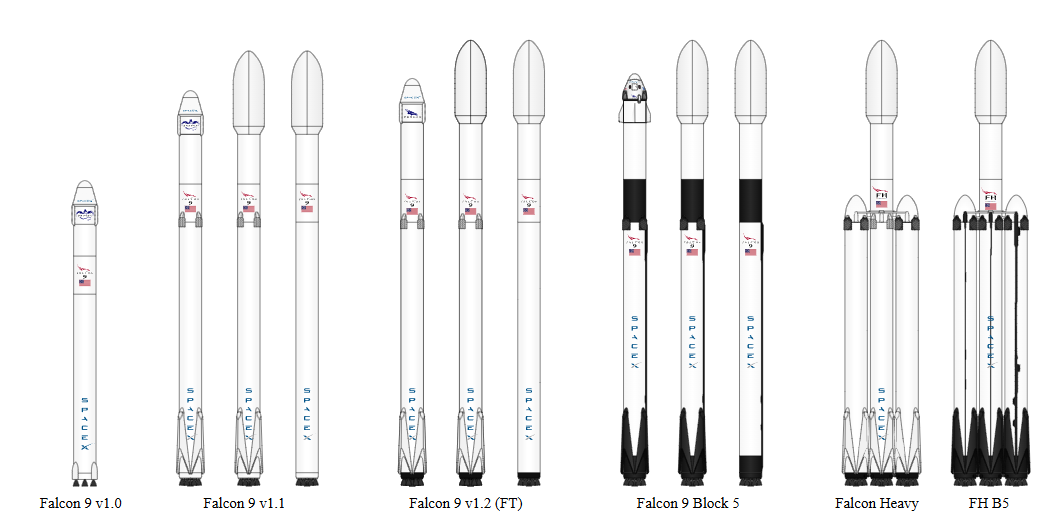

In [ ]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

y le proporcionaremos algunas funciones auxiliares para que pueda procesar la tabla HTML extraída de la web.

In [ ]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()

    colunm_name = ' '.join(row.contents)

    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [ ]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

In [ ]:
# Hacer la solicitud con headers
response = requests.get(static_url, headers=headers)

# Verificar el código de estado
print(response.status_code)  # Debe devolver 200 si la solicitud fue exitosa

# Crear el objeto BeautifulSoup a partir del contenido HTML
soup = BeautifulSoup(response.text, "html.parser")

# Verificar si el objeto se creó correctamente
print(soup.title.text)

200
List of Falcon 9 and Falcon Heavy launches - Wikipedia


In [ ]:
# Usar find_all() en el objeto BeautifulSoup para obtener todas las tablas HTML
html_tables = soup.find_all("table")

# Imprimir la cantidad de tablas encontradas
print("Número total de tablas encontradas:", len(html_tables))

Número total de tablas encontradas: 25


In [ ]:
# Let's print the third table and check its content
first_launch_table = html_tables[2]
#print(first_launch_table)

In [ ]:
column_names = []

for th in first_launch_table.find_all("th"):
    name = extract_column_from_header(th)
    if name is not None and len(name) > 0:
        column_names.append(name)

print(column_names)


['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


TAREA 3: Crear un marco de datos analizando las tablas HTML de inicio

- Crearemos un diccionario vacío con las claves de los nombres de columna extraídos en la tarea anterior. Posteriormente, este diccionario se convertirá en un marco de datos de Pandas.

In [ ]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [ ]:
extracted_row = 0
#Extract each table
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element
        row=rows.find_all('td')
        #if it is number save cells in a dictonary
        if flag:
            extracted_row += 1
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            #print(flight_number)
            datatimelist=date_time(row[0])

            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            #print(date)

            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            #print(time)

            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            print(bv)

            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            #print(launch_site)

            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            #print(payload)

            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            #print(payload)

            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            #print(orbit)

            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            customer = row[6].a.string
            #print(customer)

            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            #print(launch_outcome)

            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            #print(booster_landing)


F9 v1.07B0003.18
F9 v1.07B0004.18
F9 v1.07B0005.18
F9 v1.07B0006.18
F9 v1.07B0007.18
F9 v1.17B10038
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 v1.1[
F9 FT[
F9 v1.1[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT[
F9 FT♺[
F9 FT[
F9 FT[
F9 FT[
F9 FTB1029.2195
F9 FT[
F9 FT[
F9 B4[
F9 FT[
F9 B4[
F9 B4[
F9 FTB1031.2220
F9 B4[
F9 FTB1035.2227
F9 FTB1036.2227
F9 B4[
F9 FTB1032.2245
F9 FTB1038.2268
F9 B4[
F9 B4B1041.2268
F9 B4B1039.2292
F9 B4[
F9 B5311B1046.1268
F9 B4B1043.2322
F9 B4B1040.2268
F9 B4B1045.2336
F9 B5
F9 B5349B1048[
F9 B5B1046.2354
F9 B5[
F9 B5B1048.2364
F9 B5B1047.2268
F9 B5B1046.3268
F9 B5[
F9 B5[
F9 B5B1049.2397
F9 B5B1048.3399
F9 B5[]413
F9 B5[
F9 B5B1049.3434
F9 B5B1051.2420
F9 B5B1056.2465
F9 B5B1047.3472
F9 B5
F9 B5[
F9 B5B1056.3482
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5
F9 B5[
F9 B5
F9 B5
F9 B5
F9 B5B1058.2544
F9 B5
F9 B5B1049.6544
F9 B5
F9 B5B1060.2563
F9 B5B1058.3565
F9 B5B1051.6568


AttributeError: 'NoneType' object has no attribute 'string'

# **Space X Falcon 9 First Stage Landing Prediction**

En este laboratorio, realizaremos un Análisis Exploratorio de Datos (EDA) para identificar patrones en los datos y determinar la etiqueta para el entrenamiento de los modelos supervisados.

En el conjunto de datos, existen varios casos en los que el cohete no aterrizó correctamente. En ocasiones, se intentó un aterrizaje, pero falló debido a un accidente; por ejemplo, "Océano Verdadero" significa que el resultado de la misión aterrizó correctamente en una región específica del océano, mientras que "Océano Falso" significa que el resultado de la misión aterrizó sin éxito en una región específica del océano. "RTLS Verdadero" significa que el resultado de la misión aterrizó correctamente en una plataforma terrestre. "RTLS Falso" significa que el resultado de la misión aterrizó sin éxito en una plataforma terrestre. "ASDS Verdadero" significa que el resultado de la misión aterrizó correctamente en un dron. "ASDS Falso" significa que el resultado de la misión aterrizó sin éxito en un dron.

En este laboratorio, convertiremos principalmente estos resultados en etiquetas de entrenamiento: 1 significa que el cohete aterrizó correctamente y 0 significa que no tuvo éxito.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Analysis**

In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


In [ ]:
df.isnull().sum()/len(df)*100

,0
FlightNumber,0.000000
Date,0.000000
BoosterVersion,0.000000
PayloadMass,0.000000
Orbit,0.000000
LaunchSite,0.000000
Outcome,0.000000
Flights,0.000000
GridFins,0.000000
Reused,0.000000


In [ ]:
df.dtypes

,0
FlightNumber,int64
Date,object
BoosterVersion,object
PayloadMass,float64
Orbit,object
LaunchSite,object
Outcome,object
Flights,int64
GridFins,bool
Reused,bool


In [ ]:
# Apply value_counts() on column LaunchSite
print("***********************************")
print("Cantidad de lanzamientos por lugar")
print("***********************************")
df['LaunchSite'].value_counts()

***********************************
Cantidad de lanzamientos por lugar
***********************************


,count
LaunchSite,
CCAFS SLC 40,55
KSC LC 39A,22
VAFB SLC 4E,13


Cada lanzamiento apunta a una órbita dedicada, y estos son algunos tipos de órbitas comunes:

- **LEO:** La órbita terrestre baja (LEO) es una órbita centrada en la Tierra con una altitud de 2000 km (1200 mi) o menos (aproximadamente un tercio del radio terrestre),[1] o con al menos 11,25 períodos por día (un período orbital de 128 minutos o menos) y una excentricidad inferior a 0,25.[2] La mayoría de los objetos artificiales en el espacio exterior se encuentran en LEO [1].

- **VLEO:** Las órbitas terrestres muy bajas (VLEO) se pueden definir como órbitas con una altitud media inferior a 450 km. Operar en estas órbitas puede ofrecer diversas ventajas a las naves espaciales de observación de la Tierra, ya que operan más cerca del punto de observación[2].

- **GTO (órbita de transferencia geoestacionaria):** Una órbita de transferencia geoestacionaria es una órbita elíptica terrestre utilizada para transferir satélites de la órbita terrestre baja (LEO) a la órbita geoestacionaria (GEO). En una órbita geoestacionaria (GTO), el perigeo (punto más cercano a la Tierra) es mucho menor que la altitud GEO, mientras que el apogeo (punto más lejano) alcanza aproximadamente 35 786 kilómetros (22 236 millas) sobre el ecuador terrestre, la altitud de una órbita geoestacionaria. Los satélites en GTO utilizan propulsión a bordo para circularizar su órbita a altitud GEO, donde pueden proporcionar servicios como monitoreo meteorológico, comunicaciones y vigilancia. [3]

- **SSO (o SO):** Es una órbita heliosíncrona, también llamada órbita heliosíncrona, una órbita casi polar alrededor de un planeta, en la que el satélite pasa sobre cualquier punto dado de la superficie del planeta a la misma hora solar media local [4].

- **ES-L1:** En los puntos de Lagrange, las fuerzas gravitacionales de los dos cuerpos grandes se cancelan de tal manera que un objeto pequeño colocado en órbita allí está en equilibrio con respecto al centro de masas de los cuerpos grandes. L1 es uno de estos puntos entre el Sol y la Tierra [5].

- **HEO (Órbita altamente elíptica)** es una órbita elíptica con alta excentricidad, generalmente alrededor de la Tierra [6].

- **ISS (Estación Espacial Internacional)** es una estación espacial modular (satélite artificial habitable) en órbita terrestre baja. Es un proyecto de colaboración multinacional entre cinco agencias espaciales participantes: NASA (Estados Unidos), Roscosmos (Rusia), JAXA (Japón), ESA (Europa) y CSA (Canadá) [7].

- **MEO (Órbitas geocéntricas)** cuya altitud oscila entre los 2000 km (1200 mi) y justo por debajo de la órbita geosíncrona, a 35 786 km (22 236 mi). También se conoce como órbita circular intermedia. Estos se encuentran comúnmente a 20.200 kilómetros (12.600 mi) o 20.650 kilómetros (12.830 mi), con un período orbital de 12 horas [8]

- **HEO:** Órbitas geocéntricas por encima de la altitud de la órbita geosíncrona (35.786 km o 22.236 mi) [9]

- **GEO:** Es una órbita geosíncrona circular a 35.786 kilómetros (22.236 millas) sobre el ecuador terrestre y que sigue la dirección de rotación de la Tierra [10]

- **PO:** Es un tipo de satélite en el que un satélite pasa por encima o casi por encima de ambos polos del cuerpo orbitado (generalmente un planeta como la Tierra [11]).

Algunos se muestran en la siguiente gráfica:

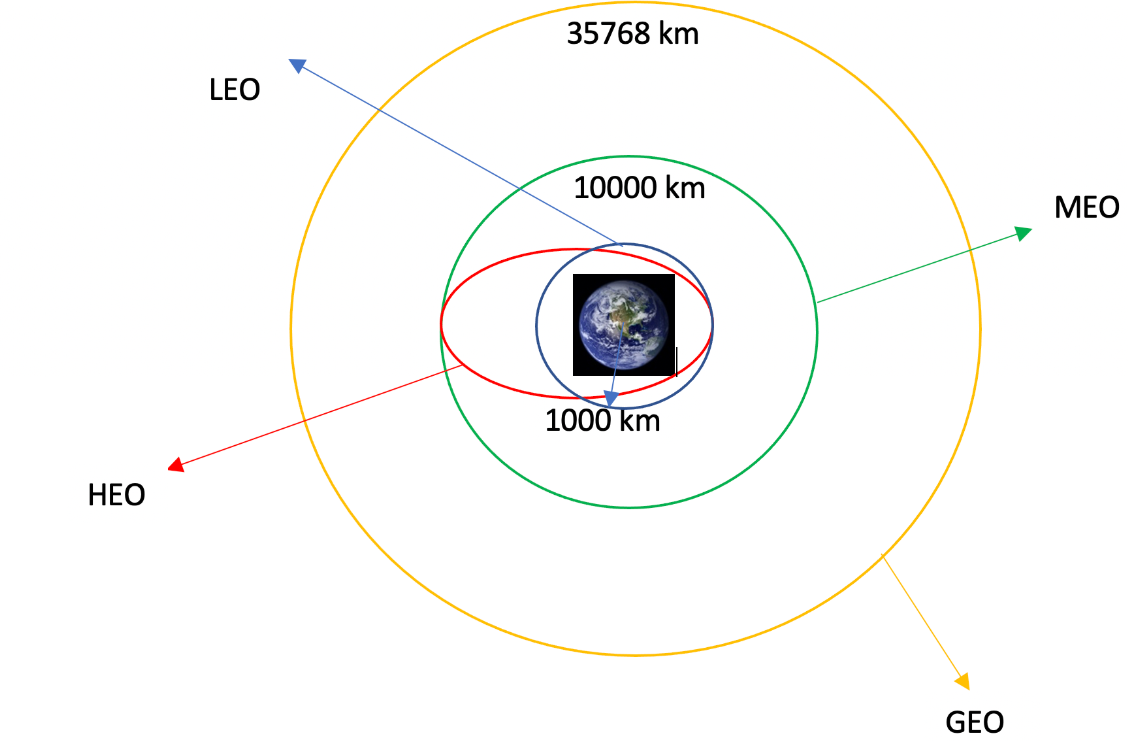

In [ ]:
# Apply value_counts on Orbit column
df['Orbit'].value_counts()


,count
Orbit,
GTO,27
ISS,21
VLEO,14
PO,9
LEO,7
SSO,5
MEO,3
HEO,1
ES-L1,1


In [ ]:
# Calcular el número y la ocurrencia del resultado de la misión de las órbitas.
# landing_outcomes = values on Outcome column
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


Océano Verdadero significa que el resultado de la misión aterrizó con éxito en una región específica del océano, mientras que Océano Falso significa que el resultado de la misión aterrizó sin éxito en una región específica del océano. RTLS Verdadero significa que el resultado de la misión aterrizó con éxito en una plataforma de tierra. RTLS Falso significa que el resultado de la misión aterrizó sin éxito en una plataforma de tierra. ASDS Verdadero significa que el resultado de la misión aterrizó con éxito en un barco dron. ASDS Falso significa que el resultado de la misión aterrizó sin éxito en un barco dron. Sin ASDS y Sin Ninguno representan un aterrizaje fallido.

In [ ]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)
# Creamos un conjunto de resultados donde la segunda etapa no tuvo éxito:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

Crear una etiqueta de resultado de aterrizaje a partir de la columna Resultado

In [ ]:
landing_class = []

# Recorremos cada fila del DataFrame
for outcome in df['Outcome']:
    if outcome in bad_outcomes:
        landing_class.append(0)
    else:
        landing_class.append(1)

# Asignamos la lista al DataFrame
df['Class'] = landing_class

# Mostramos las primeras filas
df[['Outcome', 'Class']].head(8)

,Outcome,Class
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0
5,None None,0
6,True Ocean,1
7,True Ocean,1


In [ ]:
df.head(5)
df['Class'].mean()
df['Class'].value_counts()

,count
Class,
1,60
0,30


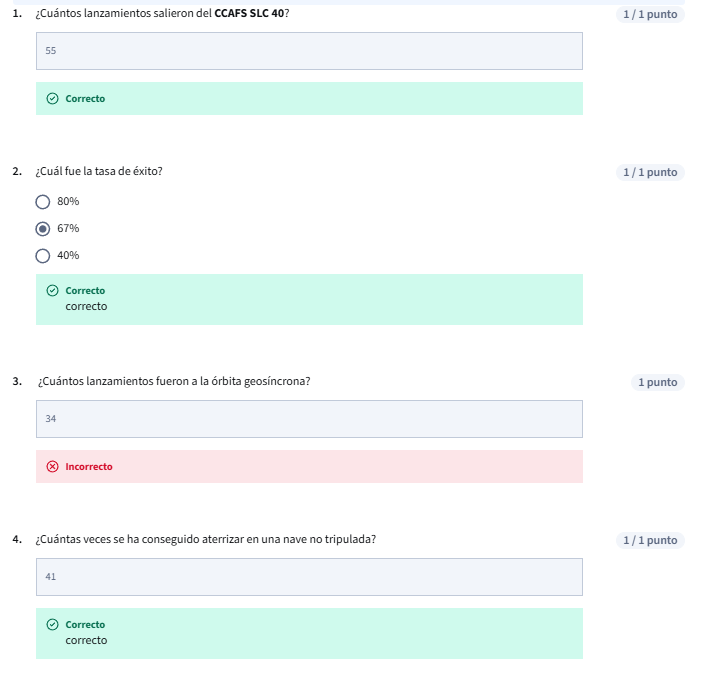

# **Tarea: Cuaderno de SQL para la asignación entre pares**

In [ ]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [ ]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [ ]:
%load_ext sql
%sql sqlite:///my_data1.db
#DROP THE TABLE IF EXISTS
%sql DROP TABLE IF EXISTS SPACEXTABLE
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.
 * sqlite:///my_data1.db
Done.


[]

In [ ]:
# Muestra los nombres de los sitios de lanzamiento únicos en la misión espacial.
%sql select distinct landing_outcome from SPACEXTBL

In [ ]:
# Muestra 5 registros donde los sitios de lanzamiento comienzan con la cadena 'CCA'
%sql select * from SPACEXTBL where landing_outcome like 'Success (drone ship)' limit 5

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2016-04-08,20:43:00,F9 FT B1021.1,CCAFS LC-40,SpaceX CRS-8,3136,LEO (ISS),NASA (CRS),Success,Success (drone ship)
2016-05-06,5:21:00,F9 FT B1022,CCAFS LC-40,JCSAT-14,4696,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2016-05-27,21:39:00,F9 FT B1023.1,CCAFS LC-40,Thaicom 8,3100,GTO,Thaicom,Success,Success (drone ship)
2016-08-14,5:26:00,F9 FT B1026,CCAFS LC-40,JCSAT-16,4600,GTO,SKY Perfect JSAT Group,Success,Success (drone ship)
2017-01-14,17:54:00,F9 FT B1029.1,VAFB SLC-4E,Iridium NEXT 1,9600,Polar LEO,Iridium Communications,Success,Success (drone ship)


## Exploring and Preparing Data

In [ ]:
import requests
import pandas as pd
import io

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(url)
df = pd.read_csv(io.StringIO(response.text))

df.head(5)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Primero, veamos cómo las variables FlightNumber (que indica los intentos de lanzamiento continuos) y Payload (carga útil) afectarían el resultado del lanzamiento.

Podemos representar gráficamente FlightNumber vs. PayloadMass (masa de la carga útil) y superponer el resultado del lanzamiento. Observamos que, a medida que aumenta el número de vuelo, la primera etapa tiene más probabilidades de aterrizar con éxito. La masa de la carga útil también parece ser un factor; incluso con cargas útiles más pesadas, la primera etapa suele regresar con éxito.

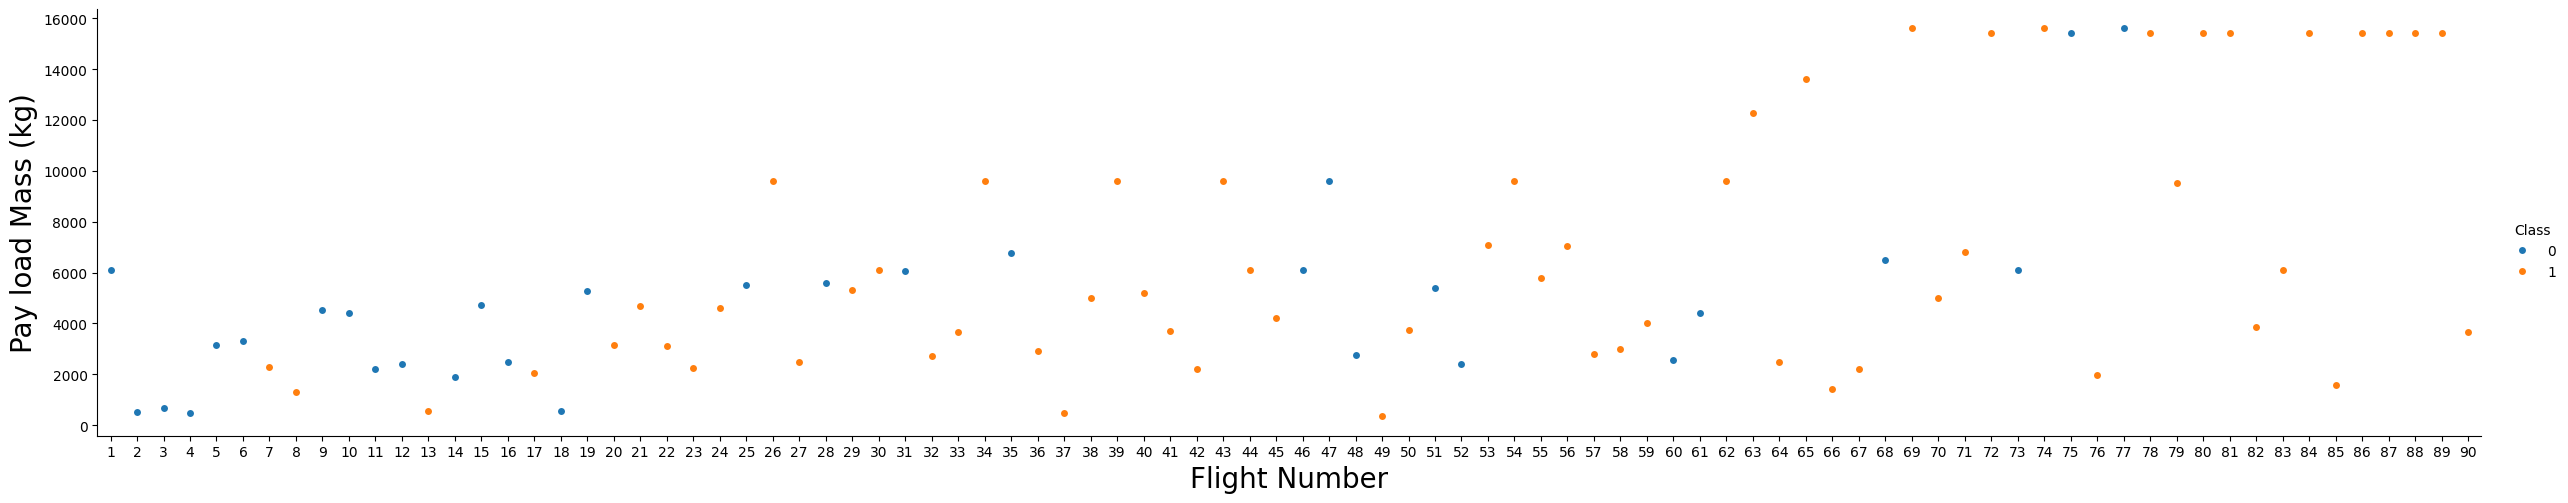

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

- De la grafica se puede concluir que la tasa de exito mas alta se da para vuelos que tienen un peso mayor a los 10,000 kg

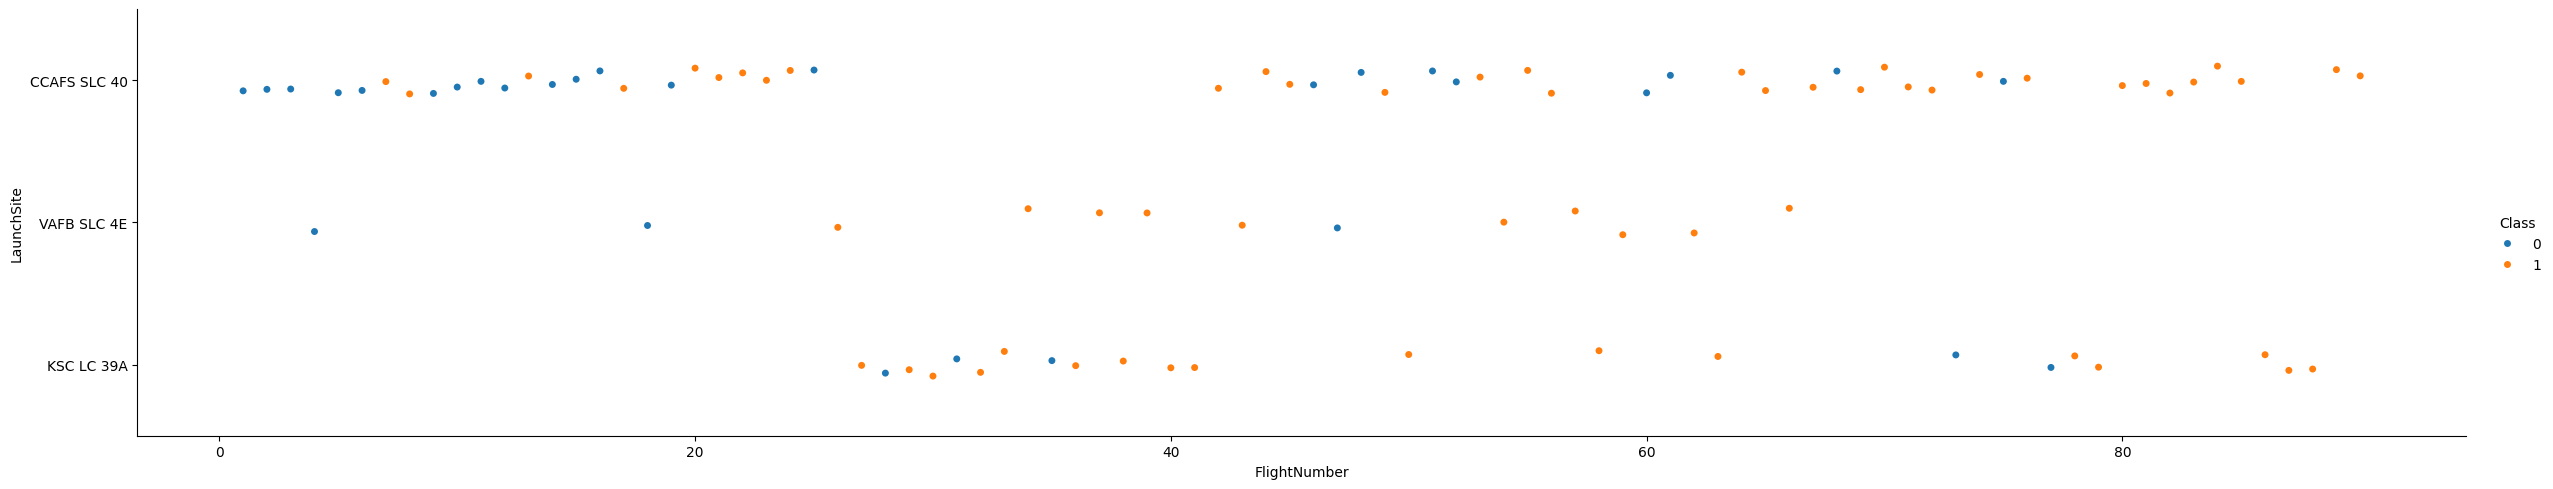

In [ ]:
# Visualice la relación entre el número de vuelo y el lugar de lanzamiento
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot( y='LaunchSite', x='FlightNumber', hue='Class', data=df, aspect = 5)
plt.show()

In [ ]:
# Agrupar por sitio de lanzamiento y contar los valores de éxito y fallo
launch_success_fail = df.groupby('LaunchSite')['Class'].value_counts().unstack(fill_value=0)

# Calcular porcentaje de éxito por sitio
success_rate = df.groupby('LaunchSite')['Class'].mean() * 100

# Unirlo con la tabla anterior
result = launch_success_fail.join(success_rate.rename('Tasa_Éxito (%)')).round(2)
result

,0,1,Tasa_Éxito (%)
LaunchSite,,,
CCAFS SLC 40,22,33,60.00
KSC LC 39A,5,17,77.27
VAFB SLC 4E,3,10,76.92


- Se puede observar que hay una mayor tasa de exito si el lanzamiento se realiza desde KSC

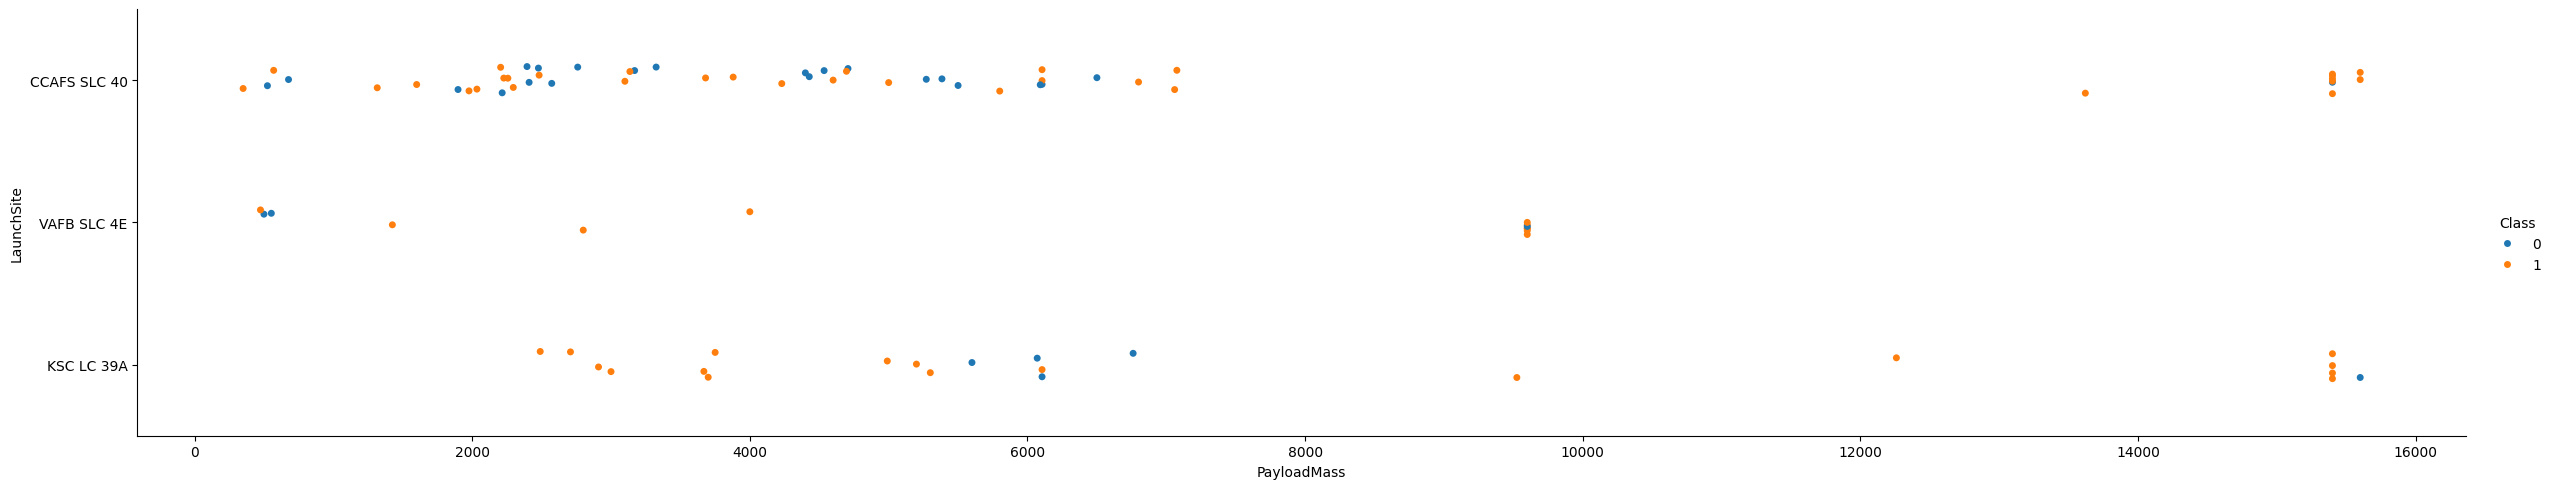

In [ ]:
#Visualizar la relación entre la masa de la carga útil y el sitio de lanzamiento
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot( y='LaunchSite', x='PayloadMass', hue='Class', data=df, aspect = 5)
plt.show()

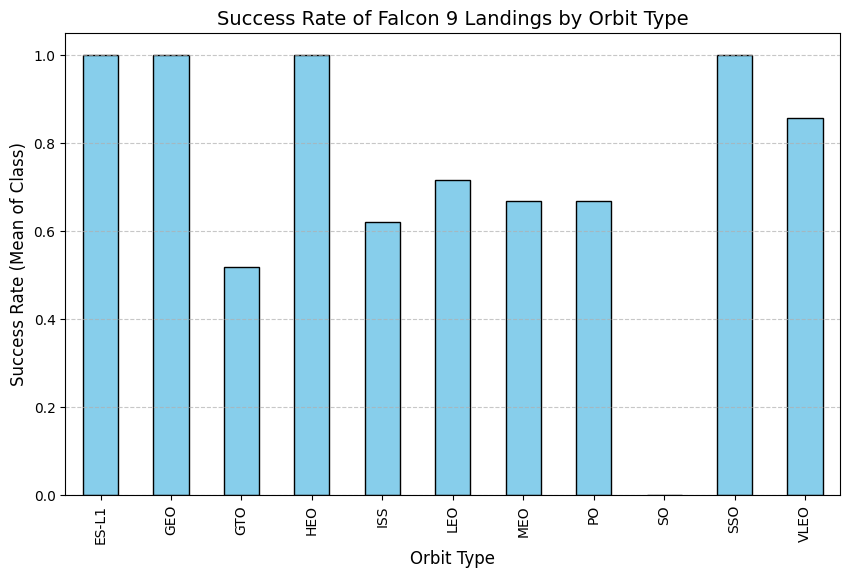

In [ ]:
# Visualice la relación entre la tasa de éxito de cada tipo de órbita
# HINT use groupby method on Orbit column and get the mean of Class column

# Calcular tasa de éxito promedio por tipo de órbita
success_rate = df.groupby('Orbit')['Class'].mean()

# Crear el gráfico de barras
success_rate.plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')

# Agregar título y etiquetas
plt.title('Success Rate of Falcon 9 Landings by Orbit Type', fontsize=14)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate (Mean of Class)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



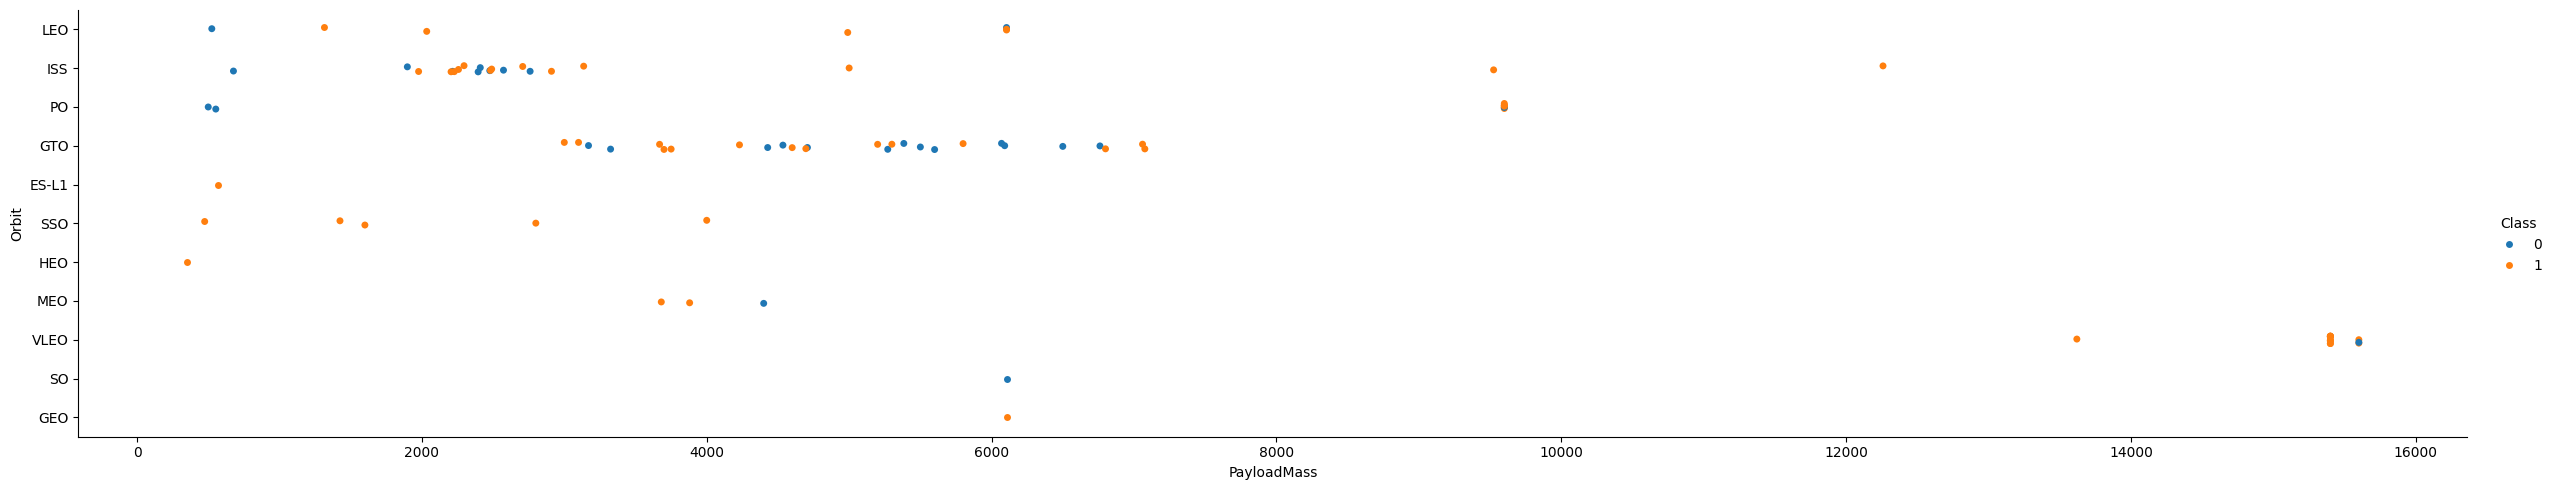

In [ ]:
# Visualice la relación entre la masa de la carga útil y el tipo de órbita
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
sns.catplot( y='Orbit', x='PayloadMass', hue='Class', data=df, aspect = 5)
plt.show()

In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


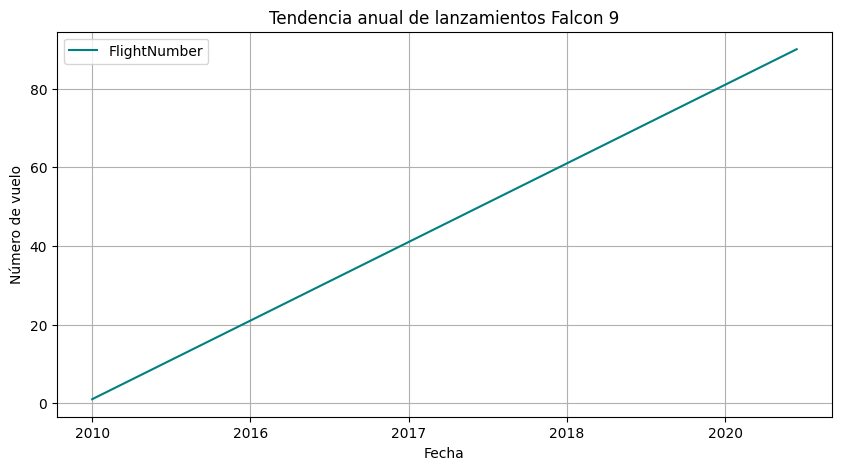

In [ ]:
# Visualizar la tendencia anual de éxito del lanzamiento
df.plot(kind='line', x='Date', y='FlightNumber', figsize=(10,5), color='teal')
plt.title('Tendencia anual de lanzamientos Falcon 9')
plt.xlabel('Fecha')
plt.ylabel('Número de vuelo')
plt.grid(True)
plt.show()



### Features Engineering

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
# Seleccionamos las columnas categóricas a transformar
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Aplicamos get_dummies al DataFrame 'features'
features_one_hot = pd.get_dummies(features, columns=categorical_columns)

# Mostramos las primeras filas del nuevo DataFrame
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Convertimos todas las columnas a tipo float64
features_one_hot = features_one_hot.astype('float64')

# Verificamos que todo sea float64
features_one_hot.dtypes.head()

,0
FlightNumber,float64
PayloadMass,float64
Flights,float64
GridFins,float64
Reused,float64


# **Dashboard en Python**

## Hands-on Lab: Interactive Visual Analytics with Folium

La tasa de éxito de un lanzamiento puede depender de muchos factores, como la masa de la carga útil, el tipo de órbita, etc. También puede depender de la ubicación y la proximidad del sitio de lanzamiento, es decir, la posición inicial de las trayectorias del cohete. Encontrar la ubicación óptima para construir un sitio de lanzamiento sin duda implica muchos factores, y esperamos poder descubrir algunos de ellos analizando las ubicaciones de los sitios de lanzamiento existentes.

In [ ]:
import folium
import pandas as pd
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

**Task 1: Mark all launch sites on a map**

In [44]:
# Download and read the `spacex_launch_geo.csv`
# Download and read the `spacex_launch_geo.csv`
import requests as rq
import io
import pandas as pd

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv'

# Obtener el archivo CSV con requests
resp = rq.get(URL)
# Leer el contenido como archivo en memoria
spacex_csv_file = io.BytesIO(resp.content)
# Crear el DataFrame
spacex_df = pd.read_csv(spacex_csv_file)
# Verificar datos
spacex_df.head()


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [ ]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [31]:
# Primero debemos crear un objeto de mapa de folium, con una ubicación central inicial que será el Centro Espacial Johnson de la NASA en Houston, Texas.
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

#Podríamos usar folium.Circle para agregar un área circular resaltada con una etiqueta de texto en una coordenada específica. Por ejemplo:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)




In [32]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label

# Para evitar el recorrido con el for, se pyede utilizar la variable Apply.
def add_site(r):
    loc = [r['Lat'], r['Long']]
    name = r['Launch Site']
    folium.Circle(loc, radius=3000, color="#d35400", fill=True, fill_opacity=0.15,
                  popup=folium.Popup(name, max_width=250)).add_to(site_map)
    folium.Marker(loc, icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
                  html=f"<div style='font-size:12px;color:#d35400;'><b>{name}</b></div>")).add_to(site_map)

launch_sites_df.apply(add_site, axis=1)
site_map

Ahora, puedes explorar el mapa ampliando o reduciendo las áreas marcadas e intentar responder las siguientes preguntas:

- ¿Están todos los sitios de lanzamiento cerca de la línea del Ecuador?
- ¿Están todos los sitios de lanzamiento muy cerca de la costa?

Intenta también explicar tus hallazgos.

In [33]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [34]:
# Comenzamos creando el objeto MarkerCluster
marker_cluster = MarkerCluster()

# Crear la nueva columna marker_color según la condición
spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')

# Verificar el resultado
spacex_df[['Launch Site', 'class', 'marker_color']].head()


,Launch Site,class,marker_color
0,CCAFS LC-40,0,red
1,CCAFS LC-40,0,red
2,CCAFS LC-40,0,red
3,CCAFS LC-40,0,red
4,CCAFS LC-40,0,red


In [35]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# (Opcional) si aún no creaste la columna de color:
# spacex_df['marker_color'] = spacex_df['class'].apply(lambda x: 'green' if x == 1 else 'red')
# Recorre el dataframe y agrega un marcador por lanzamiento
for _, row in spacex_df[['Launch Site','Lat','Long','class','marker_color']].dropna(subset=['Lat','Long']).iterrows():
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=folium.Popup(
            html=(f"<b>Launch Site:</b> {row['Launch Site']}<br>"
                  f"<b>Class (success=1):</b> {row['class']}"),
            max_width=250
        ),
        icon=folium.Icon(color=row['marker_color'])  # 'green' o 'red'
        # si tu entorno soporta Font Awesome: icon='rocket', prefix='fa'
    ).add_to(marker_cluster)

# Mostrar el mapa en el notebook
site_map



In [36]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [37]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance


In [40]:
# find coordinate of the closet coastline
launch_site_lat= 28.56367
launch_site_lon = -80.57163
#distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

# **Analisis Predictivo**

In [2]:
# Librerias a utilizar
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

**Contrsuimos la matriz de confusion para el posterior analisis**

In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [4]:
# cargmos el data frame
import requests as rq
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = rq.get(URL1)
text1 = io.BytesIO(resp1.content)
data = pd.read_csv(text1)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = rq.get(URL2)
text2 = io.BytesIO(resp2.content)
X = pd.read_csv(text2)
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## **PASOS**

**Paso 1:** Cree una matriz NumPy a partir de la columna Class en datos, aplicando el método to_numpy() y luego asígnelo a la variable Y, asegúrese de que la salida sea una serie de Pandas (solo un corchete df['nombre de la columna']).

In [7]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

**Paso 2:** Estandarice los datos en X y luego reasignelos a la variable X usando la transformación proporcionada a continuación.

In [8]:
# students get this
transform = preprocessing.StandardScaler()
# Aplicar la transformación a los datos X
X = transform.fit_transform(X)

# Verificamos el resultado
X[:5]  # muestra las primeras 5 filas estandarizadas

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

Dividimos los datos en datos de entrenamiento y de prueba mediante la función train_test_split. Los datos de entrenamiento se dividen en datos de validación y un segundo conjunto se utiliza para los datos de entrenamiento. Posteriormente, se entrenan los modelos y se seleccionan los hiperparámetros mediante la función GridSearchCV.

**Paso 3:** Utilice la función train_test_split para dividir los datos X e Y en datos de entrenamiento y de prueba. Establezca el parámetro test_size en 0.2 y random_state en 2. Los datos de entrenamiento y de prueba deben asignarse a las siguientes etiquetas.

In [9]:
# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verificar las dimensiones
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de Y_train:", Y_train.shape)
print("Tamaño de Y_test:", Y_test.shape)

Tamaño de X_train: (72, 83)
Tamaño de X_test: (18, 83)
Tamaño de Y_train: (72,)
Tamaño de Y_test: (18,)


**Paso 4:** Cree un objeto de regresión logística y luego cree un objeto GridSearchCV logreg_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros entre los parámetros del diccionario.

In [10]:
# Definimos los hiperparámetros a probar
parameters = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2'],   # tipo de regularización
    'solver': ['lbfgs']  # método de optimización
}

# Creamos el modelo base
lr = LogisticRegression()

# Creamos el objeto GridSearchCV con validación cruzada (cv=10)
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Entrenamos el modelo con los datos de entrenamiento
logreg_cv.fit(X_train, Y_train)

# Mostramos los mejores parámetros encontrados y la exactitud
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713


**Paso 5:** Calcule la precisión de los datos de prueba utilizando el método de puntuación (Score)

Test Accuracy: 0.8333333333333334


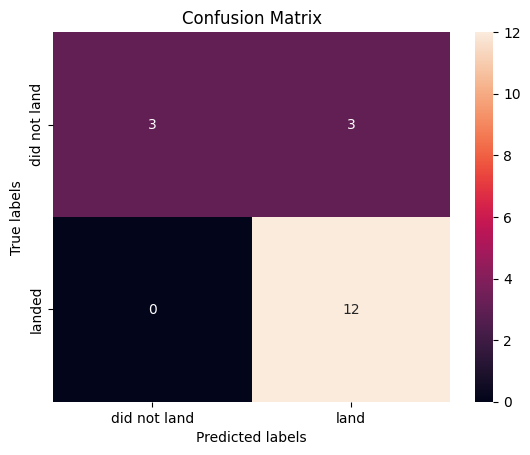

In [14]:
# 1️⃣ Calcular la exactitud del modelo en los datos de prueba
accuracy = logreg_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

# 2️⃣ Generar predicciones con los datos de prueba
yhat = logreg_cv.predict(X_test)

# 3️⃣ Calcular y graficar la matriz de confusión
cm = plot_confusion_matrix(Y_test, yhat)
cm

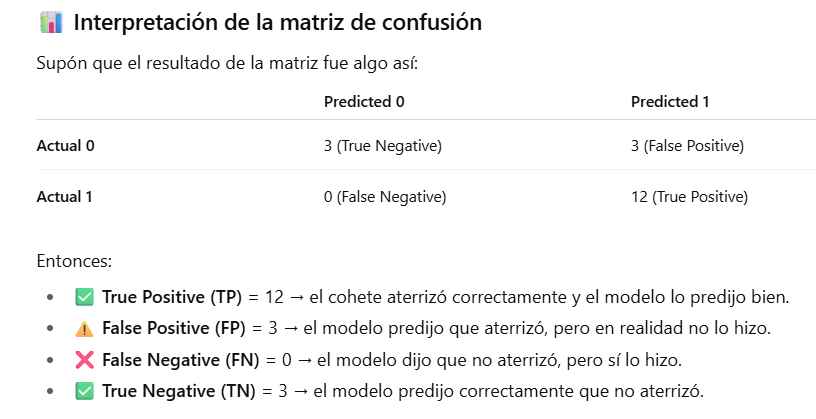

**Paso 6 y 7:** Cree un objeto de máquina de vectores de soporte y luego cree un objeto GridSearchCV svm_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros entre los parámetros del diccionario.

In [15]:
# Definir el diccionario de parámetros a evaluar
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),        # C controla la penalización por errores
    'gamma': np.logspace(-3, 3, 5)     # gamma controla la influencia de cada punto
}

# Crear el modelo base de SVM
svm = SVC()

# Crear el objeto GridSearchCV con validación cruzada (cv=10)
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Entrenar el modelo en los datos de entrenamiento
svm_cv.fit(X_train, Y_train)

# Mostrar los mejores hiperparámetros y el mejor puntaje promedio
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy: 0.8482142857142856


Test Accuracy: 0.8333333333333334


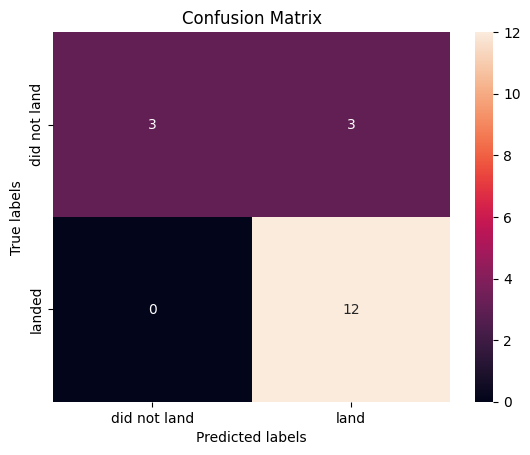

In [16]:
# 1️⃣ Calcular la exactitud del modelo en los datos de prueba
accuracy = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

# 2️⃣ Generar predicciones con los datos de prueba
yhat = svm_cv.predict(X_test)

# 3️⃣ Calcular y graficar la matriz de confusión
plot_confusion_matrix(Y_test,yhat)


**Paso 8 y 9:** Cree un objeto clasificador de árbol de decisión y luego cree un objeto GridSearchCV tree_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros de los parámetros del diccionario.



In [18]:
# Definir el conjunto de hiperparámetros a evaluar
parameters = {
    'criterion': ['gini', 'entropy'],        # función de medida de impureza
    'splitter': ['best', 'random'],          # método de división
    'max_depth': [2*n for n in range(1, 10)], # profundidad máxima del árbol
    'max_features': ['sqrt', 'log2'],        # número de características a considerar
    'min_samples_leaf': [1, 2, 4],           # mínimo de muestras en las hojas
    'min_samples_split': [2, 5, 10]          # mínimo de muestras para dividir un nodo
}

# Crear el modelo base
tree = DecisionTreeClassifier()

# Crear el objeto GridSearchCV con validación cruzada (cv=10)
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Entrenar el modelo en los datos de entrenamiento
tree_cv.fit(X_train, Y_train)

# Mostrar los mejores hiperparámetros y la precisión promedio
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Accuracy: 0.875


Test Accuracy: 0.7777777777777778


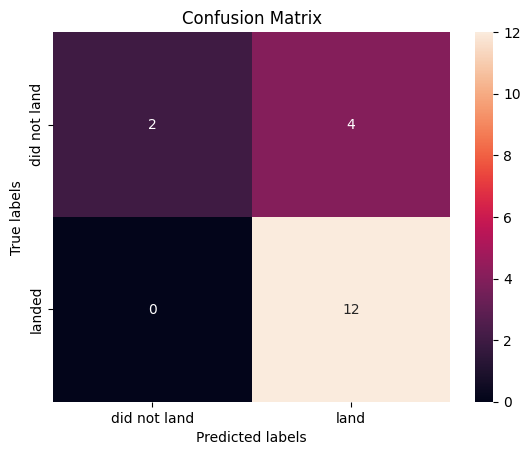

In [19]:
# 1️⃣ Calcular la exactitud del modelo en los datos de prueba
accuracy = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

# 2️⃣ Generar predicciones con los datos de prueba
yhat = tree_cv.predict(X_test)

# 3️⃣ Calcular y graficar la matriz de confusión
plot_confusion_matrix(Y_test,yhat)

**Paso 10 y 11:** Cree un objeto de k vecinos más cercanos y luego cree un objeto GridSearchCV knn_cv con cv = 10. Ajuste el objeto para encontrar los mejores parámetros de los parámetros del diccionario.

In [20]:
# Definir el conjunto de hiperparámetros a evaluar
parameters = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Número de vecinos más cercanos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Método para calcular vecinos
    'p': [1, 2]  # Distancia: 1=Manhattan, 2=Euclidiana
}

# Crear el modelo base de KNN
KNN = KNeighborsClassifier()

# Crear el objeto GridSearchCV con validación cruzada (cv=10)
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Entrenar el modelo en los datos de entrenamiento
knn_cv.fit(X_train, Y_train)

# Mostrar los mejores hiperparámetros y la precisión promedio
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858


Test Accuracy: 0.8333333333333334


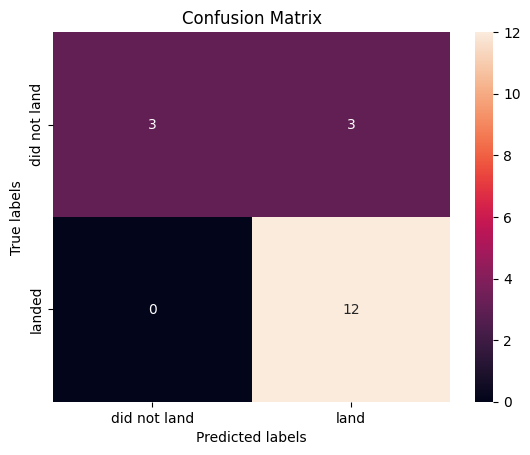

In [21]:
# 1️⃣ Calcular la exactitud del modelo en los datos de prueba
accuracy = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

# 2️⃣ Generar predicciones con los datos de prueba
yhat = knn_cv.predict(X_test)

# 3️⃣ Calcular y graficar la matriz de confusión
plot_confusion_matrix(Y_test,yhat)

In [22]:
import pandas as pd

results = {
    'Logistic Regression': {
        'CV_mean_accuracy': logreg_cv.best_score_,
        'Test_accuracy': logreg_cv.score(X_test, Y_test)
    },
    'SVM': {
        'CV_mean_accuracy': svm_cv.best_score_,
        'Test_accuracy': svm_cv.score(X_test, Y_test)
    },
    'Decision Tree': {
        'CV_mean_accuracy': tree_cv.best_score_,
        'Test_accuracy': tree_cv.score(X_test, Y_test)
    },
    'KNN': {
        'CV_mean_accuracy': knn_cv.best_score_,
        'Test_accuracy': knn_cv.score(X_test, Y_test)
    }
}

df_results = pd.DataFrame(results).T.sort_values('Test_accuracy', ascending=False)
print(df_results)

best_by_test = df_results['Test_accuracy'].idxmax()
print(f"\n➡️ Best model on TEST set: {best_by_test} "
      f"(accuracy={df_results.loc[best_by_test, 'Test_accuracy']:.4f})")

best_by_cv = df_results['CV_mean_accuracy'].idxmax()
print(f"➡️ Best model by CV mean accuracy: {best_by_cv} "
      f"(cv={df_results.loc[best_by_cv, 'CV_mean_accuracy']:.4f})")


                     CV_mean_accuracy  Test_accuracy
Logistic Regression          0.846429       0.833333
SVM                          0.848214       0.833333
KNN                          0.848214       0.833333
Decision Tree                0.875000       0.777778

➡️ Best model on TEST set: Logistic Regression (accuracy=0.8333)
➡️ Best model by CV mean accuracy: Decision Tree (cv=0.8750)


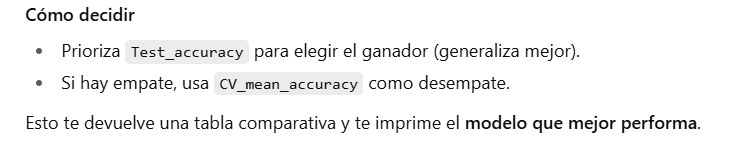